# Goodreads book reviews extractor

#### What we are going to do is build a Price predictor system for newly launched books which is going to take early reviews of the readers to predict the performance of the book within short time of the release to predict what kinds of discounts should be given on the books and what kind of promotion activities would be better suited for the books.
#### Our assumption is that Books having good reviews would still attract masses so they dont neccessarily need discounts to get to the breakeven point while books which are struggling will need to rely upon discounts and other marketing techniques to attract people, to generate volume of sales so that they can get to the breakeven point.

Importing neccessary libraries

In [2]:
#!pip install requests 
#!pip install bs4

In [74]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import seaborn as sns
%matplotlib inline

Checking if the website allows Web Scraping or not

In [5]:
url = "https://www.goodreads.com/blog/show/2617-readers-most-anticipated-books-of-fall?ref=bigbooksfall23_eb"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
print(soup)

<!DOCTYPE html>

<html class="desktop withSiteHeaderTopFullImage">
<head>
<title>Readers' 55 Most Anticipated Books of Fall  - Goodreads News &amp; Interviews</title>
<meta content="  Autumn is a good time for books, for many reasons. Seasonally, it just feels right, what with the falling leaves and roaring fireplaces. Holida..." name="description"/>
<meta content="telephone=no" name="format-detection"/>
<link href="https://www.goodreads.com/blog/show/2617-readers-55-most-anticipated-books-of-fall" rel="canonical"/>
<!-- OPEN GRAPH-->
<meta content="Readers' 55 Most Anticipated Books of Fall " property="og:title">
<meta content="article" property="og:type">
<meta content="Goodreads" property="og:site_name"/>
<meta content="  Autumn is a good time for books, for many reasons. Seasonally, it just feels right, what with the falling leaves and roaring fireplaces. Holida..." property="og:description"/>
<meta content="https://images.gr-assets.com/blogs/1689879846p8/2617.jpg" property="og:ima

Dataset 1 -
Title - June 2023 most anticipated romance releases
URL - https://www.goodreads.com/list/show/180056.June_2023_Most_Anticipated_Romance_Releases

In [6]:
url = "https://www.goodreads.com/list/show/180056.June_2023_Most_Anticipated_Romance_Releases"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

book_details = []

# Find all book items
book_items = soup.find_all('tr', itemtype='http://schema.org/Book')

for book_item in book_items:
    details = {}
    
    title = book_item.find('a', class_='bookTitle')
    details['title'] = title.get_text(strip=True)
    
    author = book_item.find('a', class_='authorName')
    details['author'] = author.get_text(strip=True)
    
    rating = book_item.find('span', class_='minirating')
    if rating:
        details['rating'] = rating.get_text(strip=True)
    else:
        details['rating'] = 'N/A'
    
    book_details.append(details)

# Save the collected book details to a CSV file
csv_filename = 'book_details1.csv'
with open(csv_filename, mode='w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Title', 'Author', 'Rating']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    
    writer.writeheader()
    for book in book_details:
        writer.writerow({'Title': book['title'], 'Author': book['author'], 'Rating': book['rating']})

print("CSV file saved:", csv_filename)

CSV file saved: book_details1.csv


In [8]:
df1 = pd.read_csv("book_details1.csv")
df1
df1.describe

<bound method NDFrame.describe of                                                 Title            Author  \
0                                 Love, Theoretically     Ali Hazelwood   
1            The Oscar Escape (Love Match Legacy, #2)     Krista Sandor   
2                      Royally In Trouble (Royal, #2)      Meghan Quinn   
3                     Reckless (Chestnut Springs, #4)      Elsie Silver   
4              Forbidden Hearts (Whitlock Family, #1)  Corinne Michaels   
..                                                ...               ...   
95  Allie's Enforcer (Silver Spoon Falls Falcons, #1)          Loni Ree   
96                                    The Deja Glitch     Holly   James   
97                     Rook (Romancing His Stone, #2)    Jillian Graves   
98                                     Vow To Protect      Julia Bright   
99                Trust Me (Evidence: Under Fire, #2)     Rachel  Grant   

                               Rating  
0   4.21 avg rating — 149

#### Similarly We are doing this for 9 more blogs for a total of 10 datasets so that we can

Extracting from link 2

In [9]:
url = "https://www.goodreads.com/list/show/18072.Little_Known_Authors_Worth_Reading"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

book_details = []

# Find all book items
book_items = soup.find_all('tr', itemtype='http://schema.org/Book')

for book_item in book_items:
    details = {}
    
    title = book_item.find('a', class_='bookTitle')
    details['title'] = title.get_text(strip=True)
    
    author = book_item.find('a', class_='authorName')
    details['author'] = author.get_text(strip=True)
    
    rating = book_item.find('span', class_='minirating')
    if rating:
        details['rating'] = rating.get_text(strip=True)
    else:
        details['rating'] = 'N/A'
    
    book_details.append(details)

# Save the collected book details to a CSV file
csv_filename = 'book_details2.csv'
with open(csv_filename, mode='w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Title', 'Author', 'Rating']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    
    writer.writeheader()
    for book in book_details:
        writer.writerow({'Title': book['title'], 'Author': book['author'], 'Rating': book['rating']})

print("CSV file saved:", csv_filename)

CSV file saved: book_details2.csv


In [10]:
df2 = pd.read_csv("book_details2.csv")
df2
df2.describe

<bound method NDFrame.describe of                                         Title                Author  \
0                        A Story of Yesterday           Sergio Cobo   
1                             Deadly Election        Arthur Crandon   
2   First I Love You (The Downey Trilogy, #1)       Genevieve Dewey   
3              Boot: A Sorta Novel of Vietnam  Charles L. Templeton   
4                                 Found Money  Peter Watson Jenkins   
..                                        ...                   ...   
95                      Secrets (Secrets, #1)         Julie Mannino   
96                   Secrets II (Secrets, #2)         Julie Mannino   
97      Shadow's Passion (Shadow Warder #0.5)        Molle McGregor   
98                      Dogshit Saved My Life          Karl Wiggins   
99                  Saving Me (Heat Wave, #1)         Alannah Lynne   

                              Rating  
0   4.59 avg rating — 11,789 ratings  
1      3.91 avg rating — 148 rating

Extracting from link 3

In [11]:
url = "https://www.goodreads.com/list/show/155086.Popular_Kindle_Notes_Highlights_on_Goodreads"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
book_details = []
# Find all book items
book_items = soup.find_all('tr', itemtype='http://schema.org/Book')
for book_item in book_items:
    details = {}
    
    title = book_item.find('a', class_='bookTitle')
    details['title'] = title.get_text(strip=True)
    
    author = book_item.find('a', class_='authorName')
    details['author'] = author.get_text(strip=True)
    
    rating = book_item.find('span', class_='minirating')
    if rating:
        details['rating'] = rating.get_text(strip=True)
    else:
        details['rating'] = 'N/A'
    
    book_details.append(details)
# Save the collected book details to a CSV file
csv_filename = 'book_details3.csv'
with open(csv_filename, mode='w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Title', 'Author', 'Rating']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    for book in book_details:
        writer.writerow({'Title': book['title'], 'Author': book['author'], 'Rating': book['rating']})

print("CSV file saved:", csv_filename)

CSV file saved: book_details3.csv


In [12]:
df3 = pd.read_csv("book_details3.csv")
df3
df3.describe

<bound method NDFrame.describe of                                                 Title                 Author  \
0                                      Station Eleven  Emily St. John Mandel   
1                                 Pride and Prejudice            Jane Austen   
2              One for the Money (Stephanie Plum, #1)        Janet Evanovich   
3                                     Never Let Me Go         Kazuo Ishiguro   
4                                       American Gods            Neil Gaiman   
..                                                ...                    ...   
87  Shadow and Bone (The Shadow and Bone Trilogy, #1)          Leigh Bardugo   
88                                        The Martian              Andy Weir   
89                                             Hamnet       Maggie O'Farrell   
90  The Southern Book Club's Guide to Slaying Vamp...          Grady Hendrix   
91              The Paper Menagerie and Other Stories                Ken Liu   

     

Extracting from 4th CSV

In [13]:
url = "https://www.goodreads.com/shelf/show/worst-of-2020"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

book_details = []

# Find all book items
book_items = soup.find_all('tr', itemtype='http://schema.org/Book')

for book_item in book_items:
    details = {}
    
    title = book_item.find('a', class_='bookTitle')
    details['title'] = title.get_text(strip=True)
    
    author = book_item.find('a', class_='authorName')
    details['author'] = author.get_text(strip=True)
    
    rating = book_item.find('span', class_='minirating')
    if rating:
        details['rating'] = rating.get_text(strip=True)
    else:
        details['rating'] = 'N/A'
    
    book_details.append(details)

# Save the collected book details to a CSV file
csv_filename = 'book_details4.csv'
with open(csv_filename, mode='w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Title', 'Author', 'Rating']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    
    writer.writeheader()
    for book in book_details:
        writer.writerow({'Title': book['title'], 'Author': book['author'], 'Rating': book['rating']})

print("CSV file saved:", csv_filename)

CSV file saved: book_details4.csv


In [14]:
df4 = pd.read_csv("book_details4.csv")
df4
df4.describe

<bound method NDFrame.describe of Empty DataFrame
Columns: [Title, Author, Rating]
Index: []>

Extracting 5th CSV

In [15]:
url = "https://www.goodreads.com/list/show/183940.Best_Books_of_2023"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

book_details = []

# Find all book items
book_items = soup.find_all('tr', itemtype='http://schema.org/Book')

for book_item in book_items:
    details = {}
    
    title = book_item.find('a', class_='bookTitle')
    details['title'] = title.get_text(strip=True)
    
    author = book_item.find('a', class_='authorName')
    details['author'] = author.get_text(strip=True)
    
    rating = book_item.find('span', class_='minirating')
    if rating:
        details['rating'] = rating.get_text(strip=True)
    else:
        details['rating'] = 'N/A'
    
    book_details.append(details)

# Save the collected book details to a CSV file
csv_filename = 'book_details5.csv'
with open(csv_filename, mode='w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Title', 'Author', 'Rating']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    
    writer.writeheader()
    for book in book_details:
        writer.writerow({'Title': book['title'], 'Author': book['author'], 'Rating': book['rating']})

print("CSV file saved:", csv_filename)

CSV file saved: book_details5.csv


In [16]:
df5 = pd.read_csv("book_details5.csv")
df5
df5.describe

<bound method NDFrame.describe of                                                 Title                  Author  \
0                      Fourth Wing (The Empyrean, #1)          Rebecca Yarros   
1                                         Happy Place             Emily Henry   
2                                          Yellowface              R.F. Kuang   
3       The Stolen Heir (The Stolen Heir Duology, #1)             Holly Black   
4                                 Love, Theoretically           Ali Hazelwood   
..                                                ...                     ...   
95                                          The Drift              C.J. Tudor   
96                             You Must Remember This          Kat Rosenfield   
97                                          Big Swiss              Jen Beagin   
98             Critical Threat (Extreme Measures, #3)           Lynette Eason   
99  The Wonder Paradox: Embracing the Weirdness of...  Jennifer Michael Hec

Extracting data from 6th Link

In [17]:
url = "https://www.goodreads.com/list/best_of_year/2022"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

book_details = []

# Find all book items
book_items = soup.find_all('tr', itemtype='http://schema.org/Book')

for book_item in book_items:
    details = {}
    
    title = book_item.find('a', class_='bookTitle')
    details['title'] = title.get_text(strip=True)
    
    author = book_item.find('a', class_='authorName')
    details['author'] = author.get_text(strip=True)
    
    rating = book_item.find('span', class_='minirating')
    if rating:
        details['rating'] = rating.get_text(strip=True)
    else:
        details['rating'] = 'N/A'
    
    book_details.append(details)

# Save the collected book details to a CSV file
csv_filename = 'book_details6.csv'
with open(csv_filename, mode='w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Title', 'Author', 'Rating']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    
    writer.writeheader()
    for book in book_details:
        writer.writerow({'Title': book['title'], 'Author': book['author'], 'Rating': book['rating']})

print("CSV file saved:", csv_filename)

CSV file saved: book_details6.csv


In [18]:
df6 = pd.read_csv("book_details6.csv")

In [19]:
df6
df6.describe

<bound method NDFrame.describe of                                             Title            Author  \
0                                     Book Lovers       Emily Henry   
1                            Lessons in Chemistry     Bonnie Garmus   
2                            I'm Glad My Mom Died  Jennette McCurdy   
3                                Reminders of Him    Colleen Hoover   
4                   The Maid (Molly the Maid, #1)        Nita Prose   
..                                            ...               ...   
95                                           Hide    Kiersten White   
96                          The Violin Conspiracy   Brendan Slocumb   
97                King of Wrath (Kings of Sin #1)         Ana Huang   
98  Sweep of the Heart (Innkeeper Chronicles, #5)     Ilona Andrews   
99                            Cursed (Gilded, #2)     Marissa Meyer   

                               Rating  
0   4.17 avg rating — 847,407 ratings  
1   4.32 avg rating — 774,936 rat

Extracting data for 7th csv

In [20]:
url = "https://www.goodreads.com/list/best_of_year/2021"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

book_details = []

# Find all book items
book_items = soup.find_all('tr', itemtype='http://schema.org/Book')

for book_item in book_items:
    details = {}
    
    title = book_item.find('a', class_='bookTitle')
    details['title'] = title.get_text(strip=True)
    
    author = book_item.find('a', class_='authorName')
    details['author'] = author.get_text(strip=True)
    
    rating = book_item.find('span', class_='minirating')
    if rating:
        details['rating'] = rating.get_text(strip=True)
    else:
        details['rating'] = 'N/A'
    
    book_details.append(details)

# Save the collected book details to a CSV file
csv_filename = 'book_details7.csv'
with open(csv_filename, mode='w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Title', 'Author', 'Rating']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    
    writer.writeheader()
    for book in book_details:
        writer.writerow({'Title': book['title'], 'Author': book['author'], 'Rating': book['rating']})

print("CSV file saved:", csv_filename)

CSV file saved: book_details7.csv


In [21]:
df7 = pd.read_csv("book_details7.csv")
df7
df7.describe

<bound method NDFrame.describe of                                                 Title               Author  \
0                                   Project Hail Mary            Andy Weir   
1                                      The Four Winds       Kristin Hannah   
2                                       Malibu Rising  Taylor Jenkins Reid   
3   A ​Court of Silver Flames (A Court of Thorns a...        Sarah J. Maas   
4                          People We Meet on Vacation          Emily Henry   
..                                                ...                  ...   
95         A Desolation Called Peace (Teixcalaan, #2)       Arkady Martine   
96                                Never Saw Me Coming          Vera Kurian   
97                                 Wish You Were Here         Jodi Picoult   
98                                 The People We Keep       Allison Larkin   
99  The Man Who Died Twice (Thursday Murder Club, #2)        Richard Osman   

                             

Extracting data for 8th Csv

In [22]:
url = "https://www.goodreads.com/list/show/125522.Lowest_Rated_Books_on_Goodreads"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

book_details = []

# Find all book items
book_items = soup.find_all('tr', itemtype='http://schema.org/Book')

for book_item in book_items:
    details = {}
    
    title = book_item.find('a', class_='bookTitle')
    details['title'] = title.get_text(strip=True)
    
    author = book_item.find('a', class_='authorName')
    details['author'] = author.get_text(strip=True)
    
    rating = book_item.find('span', class_='minirating')
    if rating:
        details['rating'] = rating.get_text(strip=True)
    else:
        details['rating'] = 'N/A'
    
    book_details.append(details)

# Save the collected book details to a CSV file
csv_filename = 'book_details8.csv'
with open(csv_filename, mode='w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Title', 'Author', 'Rating']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    
    writer.writeheader()
    for book in book_details:
        writer.writerow({'Title': book['title'], 'Author': book['author'], 'Rating': book['rating']})

print("CSV file saved:", csv_filename)

CSV file saved: book_details8.csv


In [23]:
df8 = pd.read_csv("book_details8.csv")
df8
df8.describe

<bound method NDFrame.describe of                                                 Title                Author  \
0                      Reaper's Creek (Onision Books)               Onision   
1                                     Trigger Warning  William W. Johnstone   
2                                  The Alien Artifact   Victor Bertolaccini   
3     Handbook for Mortals (Handbook for Mortals, #1)            Lani Sarem   
4                                     One Indian Girl         Chetan Bhagat   
5             Leaving Isn't the Hardest Thing: Essays         Lauren  Hough   
6                                            The Bees           Jack Laflin   
7                                           Forbidden           Eve Bunting   
8                                 The Mandrake Scream        Melisand March   
9                                  The Traitor Within          Alicen White   
10                           Cheer Up, Mr. Widdicombe            Evan James   
11                

Extracting data for DF9

In [24]:
#https://www.goodreads.com/list/show/23974.Worst_Rated_Books_on_Goodreads

In [25]:
url = "https://www.goodreads.com/list/show/23974.Worst_Rated_Books_on_Goodreads"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

book_details = []

# Find all book items
book_items = soup.find_all('tr', itemtype='http://schema.org/Book')

for book_item in book_items:
    details = {}
    
    title = book_item.find('a', class_='bookTitle')
    details['title'] = title.get_text(strip=True)
    
    author = book_item.find('a', class_='authorName')
    details['author'] = author.get_text(strip=True)
    
    rating = book_item.find('span', class_='minirating')
    if rating:
        details['rating'] = rating.get_text(strip=True)
    else:
        details['rating'] = 'N/A'
    
    book_details.append(details)

# Save the collected book details to a CSV file
csv_filename = 'book_details9.csv'
with open(csv_filename, mode='w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Title', 'Author', 'Rating']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    
    writer.writeheader()
    for book in book_details:
        writer.writerow({'Title': book['title'], 'Author': book['author'], 'Rating': book['rating']})

print("CSV file saved:", csv_filename)

CSV file saved: book_details9.csv


In [26]:
df9 = pd.read_csv("book_details9.csv")
df9
df9.describe

<bound method NDFrame.describe of                                                 Title  \
0                                  Besos entre líneas   
1   Birth Control is Sinful in the Christian Marri...   
2        A Parent's Guide to Preventing Homosexuality   
3   Coming Out Straight: Understanding and Healing...   
4      Dianetics: The Modern Science of Mental Health   
..                                                ...   
95  Here's the Situation: A Guide to Creeping on C...   
96  The Naked Truth: The Real Story Behind the Rea...   
97  I Want to Be Organized: How to De-Clutter, Man...   
98  An Arsonist's Guide to Writers' Homes in New E...   
99                                     The Dressmaker   

                              Author                           Rating  
0                    May R. Ayamonte  2.15 avg rating — 2,215 ratings  
1   Eliyzabeth Yanne Strong-Anderson    1.82 avg rating — 274 ratings  
2                    Joseph Nicolosi    1.85 avg rating — 762 rat

Extracting for df 10

In [27]:
#https://www.goodreads.com/list/show/24328.Favorite_Poorly_Rated_Books

In [28]:
url = "https://www.goodreads.com/list/show/24328.Favorite_Poorly_Rated_Books"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

book_details = []

# Find all book items
book_items = soup.find_all('tr', itemtype='http://schema.org/Book')

for book_item in book_items:
    details = {}
    
    title = book_item.find('a', class_='bookTitle')
    details['title'] = title.get_text(strip=True)
    
    author = book_item.find('a', class_='authorName')
    details['author'] = author.get_text(strip=True)
    
    rating = book_item.find('span', class_='minirating')
    if rating:
        details['rating'] = rating.get_text(strip=True)
    else:
        details['rating'] = 'N/A'
    
    book_details.append(details)

# Save the collected book details to a CSV file
csv_filename = 'book_details10.csv'
with open(csv_filename, mode='w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Title', 'Author', 'Rating']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    
    writer.writeheader()
    for book in book_details:
        writer.writerow({'Title': book['title'], 'Author': book['author'], 'Rating': book['rating']})

print("CSV file saved:", csv_filename)

CSV file saved: book_details10.csv


In [29]:
df10 = pd.read_csv("book_details10.csv")
df10
df10.describe

<bound method NDFrame.describe of                       Title                             Author  \
0        The Scarlet Letter                Nathaniel Hawthorne   
1                   Beowulf                            Unknown   
2      The Canterbury Tales                   Geoffrey Chaucer   
3   Moby-Dick or, the Whale                    Herman Melville   
4         Heart of Darkness                      Joseph Conrad   
..                      ...                                ...   
95         The Swan Gondola                  Timothy Schaffert   
96       The Sport of Kings                        C.E. Morgan   
97            Manon Lescaut  Antoine François Prévost d'Exiles   
98         Medieval Flowers                      Miranda Innes   
99                       NW                        Zadie Smith   

                               Rating  
0   3.43 avg rating — 836,805 ratings  
1   3.47 avg rating — 293,202 ratings  
2   3.52 avg rating — 215,809 ratings  
3   3.54 avg 

#### Combining all dataframes into one

Now that we have extracted all the data of books with different ratings, We are going to combine all the datasets into one single dataframe and will remove all the values that are not unique.

In [30]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

In [31]:
maindf = pd.concat(frames)

In [32]:
maindf

,Title,Author,Rating
0,"Love, Theoretically",Ali Hazelwood,"4.21 avg rating — 149,723 ratings"
1,"The Oscar Escape (Love Match Legacy, #2)",Krista Sandor,4.55 avg rating — 150 ratings
2,"Royally In Trouble (Royal, #2)",Meghan Quinn,"4.16 avg rating — 8,108 ratings"
3,"Reckless (Chestnut Springs, #4)",Elsie Silver,"4.44 avg rating — 52,054 ratings"
4,"Forbidden Hearts (Whitlock Family, #1)",Corinne Michaels,"4.05 avg rating — 10,731 ratings"
...,...,...,...
95,The Swan Gondola,Timothy Schaffert,"3.48 avg rating — 1,448 ratings"
96,The Sport of Kings,C.E. Morgan,"3.57 avg rating — 3,582 ratings"
97,Manon Lescaut,Antoine François Prévost d'Exiles,"3.44 avg rating — 12,159 ratings"
98,Medieval Flowers,Miranda Innes,3.47 avg rating — 19 ratings


In [33]:
maindf.value_counts()

Title                                                                    Author                Rating                             
Reaper's Creek (Onision Books)                                           Onision               1.13 avg rating — 317 ratings          2
Trigger Warning                                                          William W. Johnstone  1.94 avg rating — 557 ratings          2
The Particular Sadness of Lemon Cake                                     Aimee Bender          3.24 avg rating — 64,708 ratings       2
Love, Theoretically                                                      Ali Hazelwood         4.21 avg rating — 149,723 ratings      2
Handbook for Mortals (Handbook for Mortals, #1)                          Lani Sarem            1.29 avg rating — 943 ratings          2
                                                                                                                                     ..
It Starts with Us (It Ends with Us, #2)              

Now we are going to split Rating columns into 2 parts i.e. Avg ratings and total Ratings

In [34]:
maindf[["Average Rating","Total Rating"]] = maindf['Rating'].str.split('—',n = 1, expand=True)
maindf

,Title,Author,Rating,Average Rating,Total Rating
0,"Love, Theoretically",Ali Hazelwood,"4.21 avg rating — 149,723 ratings",4.21 avg rating,"149,723 ratings"
1,"The Oscar Escape (Love Match Legacy, #2)",Krista Sandor,4.55 avg rating — 150 ratings,4.55 avg rating,150 ratings
2,"Royally In Trouble (Royal, #2)",Meghan Quinn,"4.16 avg rating — 8,108 ratings",4.16 avg rating,"8,108 ratings"
3,"Reckless (Chestnut Springs, #4)",Elsie Silver,"4.44 avg rating — 52,054 ratings",4.44 avg rating,"52,054 ratings"
4,"Forbidden Hearts (Whitlock Family, #1)",Corinne Michaels,"4.05 avg rating — 10,731 ratings",4.05 avg rating,"10,731 ratings"
...,...,...,...,...,...
95,The Swan Gondola,Timothy Schaffert,"3.48 avg rating — 1,448 ratings",3.48 avg rating,"1,448 ratings"
96,The Sport of Kings,C.E. Morgan,"3.57 avg rating — 3,582 ratings",3.57 avg rating,"3,582 ratings"
97,Manon Lescaut,Antoine François Prévost d'Exiles,"3.44 avg rating — 12,159 ratings",3.44 avg rating,"12,159 ratings"
98,Medieval Flowers,Miranda Innes,3.47 avg rating — 19 ratings,3.47 avg rating,19 ratings


Removing the Rating column from maindf

In [39]:
maindf1 = maindf.drop("Rating", axis=1)
maindf1

,Title,Author,Average Rating,Total Rating
0,"Love, Theoretically",Ali Hazelwood,4.21 avg rating,"149,723 ratings"
1,"The Oscar Escape (Love Match Legacy, #2)",Krista Sandor,4.55 avg rating,150 ratings
2,"Royally In Trouble (Royal, #2)",Meghan Quinn,4.16 avg rating,"8,108 ratings"
3,"Reckless (Chestnut Springs, #4)",Elsie Silver,4.44 avg rating,"52,054 ratings"
4,"Forbidden Hearts (Whitlock Family, #1)",Corinne Michaels,4.05 avg rating,"10,731 ratings"
...,...,...,...,...
95,The Swan Gondola,Timothy Schaffert,3.48 avg rating,"1,448 ratings"
96,The Sport of Kings,C.E. Morgan,3.57 avg rating,"3,582 ratings"
97,Manon Lescaut,Antoine François Prévost d'Exiles,3.44 avg rating,"12,159 ratings"
98,Medieval Flowers,Miranda Innes,3.47 avg rating,19 ratings


Removing the word Avg rating from the Average rating column to get numeric data only

In [40]:
maindf1['Average Rating'] = maindf1['Average Rating'].replace('[a-zA-Z]', '', regex=True)
maindf1

,Title,Author,Average Rating,Total Rating
0,"Love, Theoretically",Ali Hazelwood,4.21,"149,723 ratings"
1,"The Oscar Escape (Love Match Legacy, #2)",Krista Sandor,4.55,150 ratings
2,"Royally In Trouble (Royal, #2)",Meghan Quinn,4.16,"8,108 ratings"
3,"Reckless (Chestnut Springs, #4)",Elsie Silver,4.44,"52,054 ratings"
4,"Forbidden Hearts (Whitlock Family, #1)",Corinne Michaels,4.05,"10,731 ratings"
...,...,...,...,...
95,The Swan Gondola,Timothy Schaffert,3.48,"1,448 ratings"
96,The Sport of Kings,C.E. Morgan,3.57,"3,582 ratings"
97,Manon Lescaut,Antoine François Prévost d'Exiles,3.44,"12,159 ratings"
98,Medieval Flowers,Miranda Innes,3.47,19 ratings


Removing the word rating from Total Ratings column to get numeric data

In [45]:
maindf1['Total Rating'] = maindf1['Total Rating'].replace('[a-zA-Z]', '', regex=True)
maindf1

,Title,Author,Average Rating,Total Rating
0,"Love, Theoretically",Ali Hazelwood,4.21,"149,723"
1,"The Oscar Escape (Love Match Legacy, #2)",Krista Sandor,4.55,150
2,"Royally In Trouble (Royal, #2)",Meghan Quinn,4.16,"8,108"
3,"Reckless (Chestnut Springs, #4)",Elsie Silver,4.44,"52,054"
4,"Forbidden Hearts (Whitlock Family, #1)",Corinne Michaels,4.05,"10,731"
...,...,...,...,...
95,The Swan Gondola,Timothy Schaffert,3.48,"1,448"
96,The Sport of Kings,C.E. Morgan,3.57,"3,582"
97,Manon Lescaut,Antoine François Prévost d'Exiles,3.44,"12,159"
98,Medieval Flowers,Miranda Innes,3.47,19


In [46]:
maindf1['Total Rating'] = maindf1['Total Rating'].str.replace(',', '').astype(int)
maindf1

,Title,Author,Average Rating,Total Rating
0,"Love, Theoretically",Ali Hazelwood,4.21,149723
1,"The Oscar Escape (Love Match Legacy, #2)",Krista Sandor,4.55,150
2,"Royally In Trouble (Royal, #2)",Meghan Quinn,4.16,8108
3,"Reckless (Chestnut Springs, #4)",Elsie Silver,4.44,52054
4,"Forbidden Hearts (Whitlock Family, #1)",Corinne Michaels,4.05,10731
...,...,...,...,...
95,The Swan Gondola,Timothy Schaffert,3.48,1448
96,The Sport of Kings,C.E. Morgan,3.57,3582
97,Manon Lescaut,Antoine François Prévost d'Exiles,3.44,12159
98,Medieval Flowers,Miranda Innes,3.47,19


Now We are going to apply some visualisation techniques to see Total Ratings and average ratings for all the books in the dataframe

C:\Users\goelp\AppData\Local\Temp\ipykernel_10164\1406148063.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


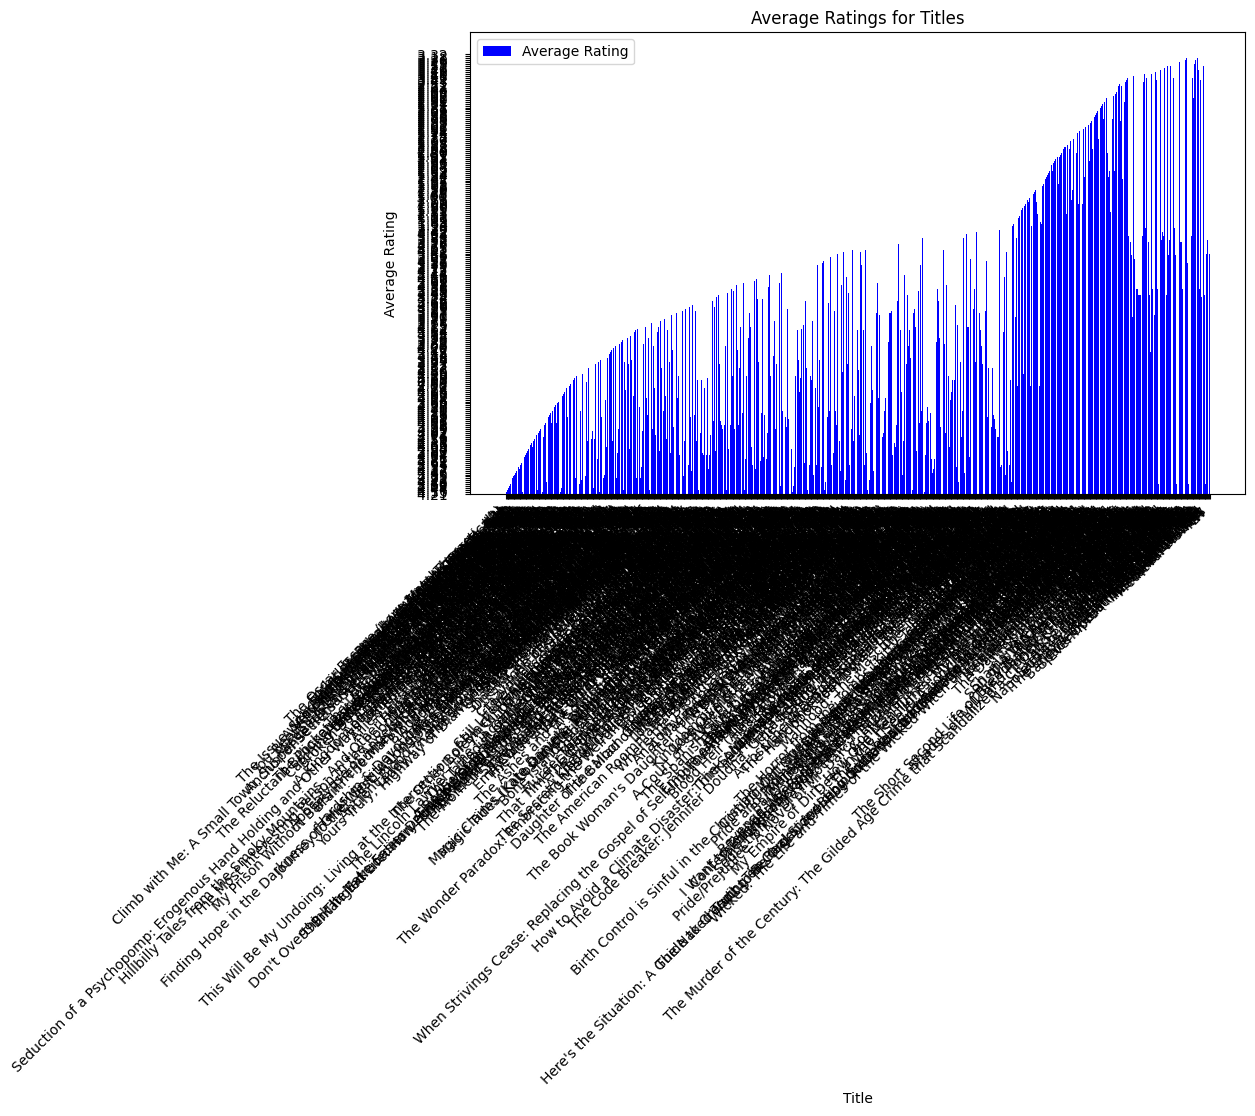

In [78]:
plt.figure(figsize=(10, 6))
plt.bar(maindf1['Title'], maindf1['Average Rating'], color='blue', label='Average Rating')
plt.xlabel('Title')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Titles')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

#Display the plot
plt.show()

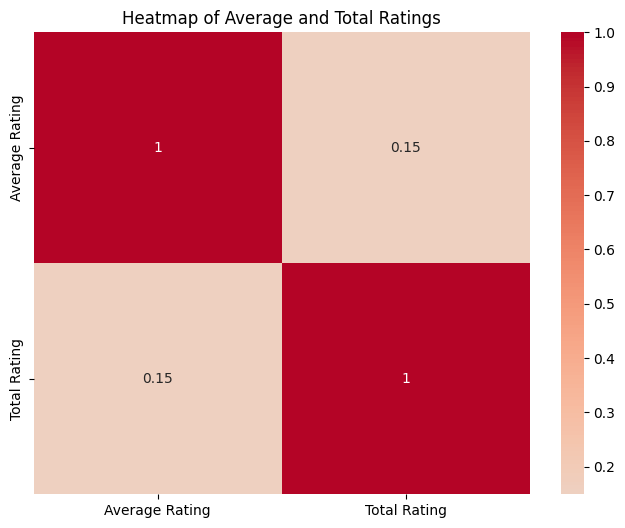

In [53]:
heatmap_data = maindf1[['Average Rating', 'Total Rating']]

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Average and Total Ratings')
plt.show()

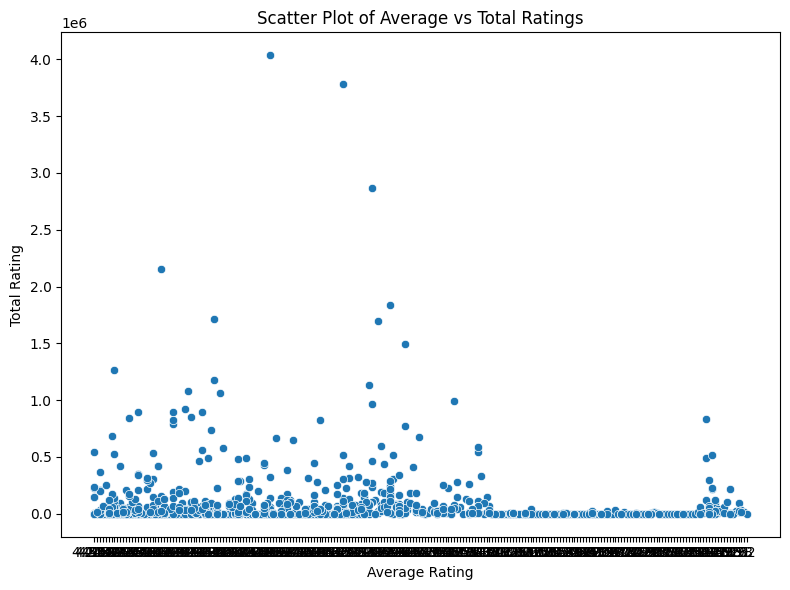

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Average Rating', y='Total Rating', data=maindf1)
plt.title('Scatter Plot of Average vs Total Ratings')
plt.tight_layout()

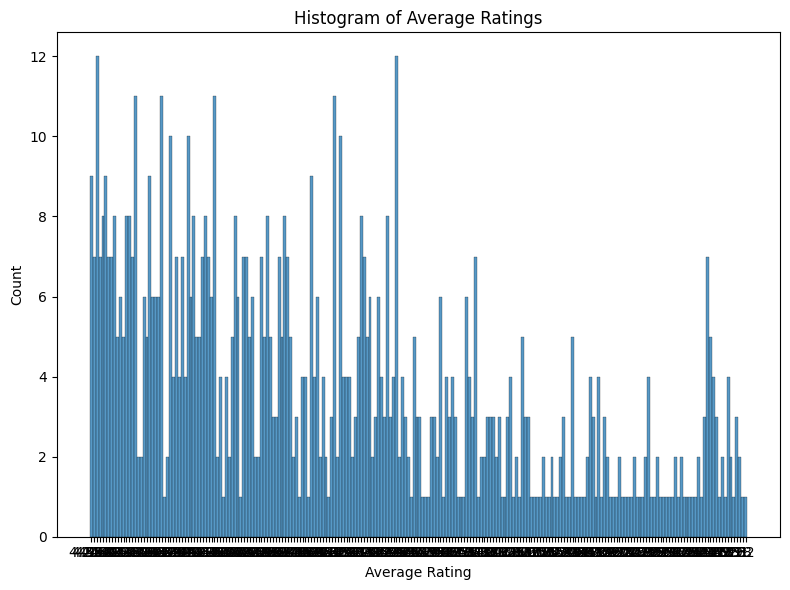

In [71]:
plt.figure(figsize=(8, 6))
sns.histplot(data=maindf1, x='Average Rating', bins=10)
plt.title('Histogram of Average Ratings')
plt.tight_layout()

C:\Users\goelp\AppData\Local\Temp\ipykernel_10164\4056603918.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


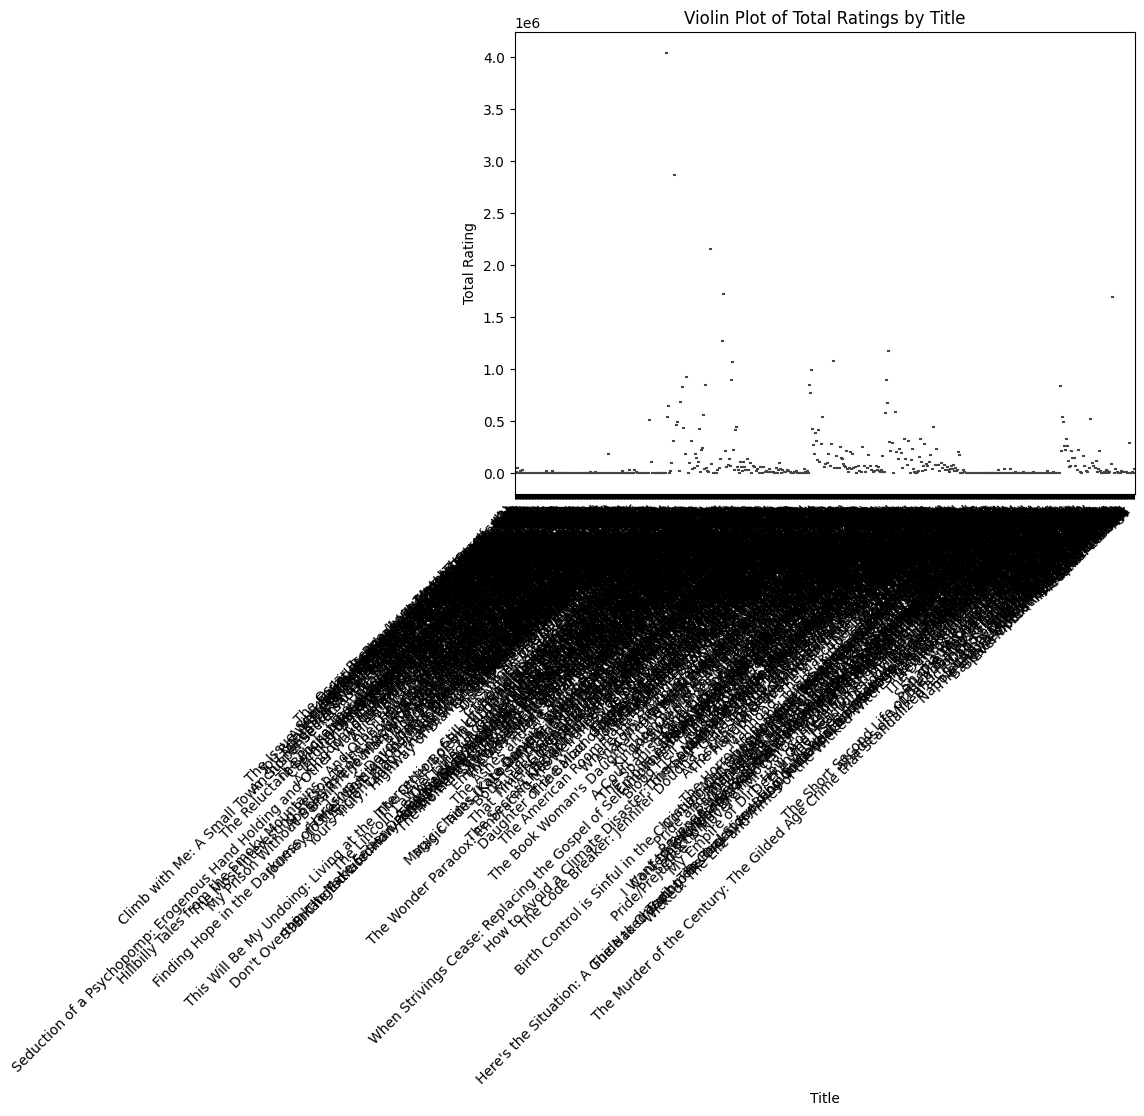

In [63]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Title', y='Total Rating', data=maindf1)
plt.xticks(rotation=45, ha='right')
plt.title('Violin Plot of Total Ratings by Title')
plt.tight_layout()

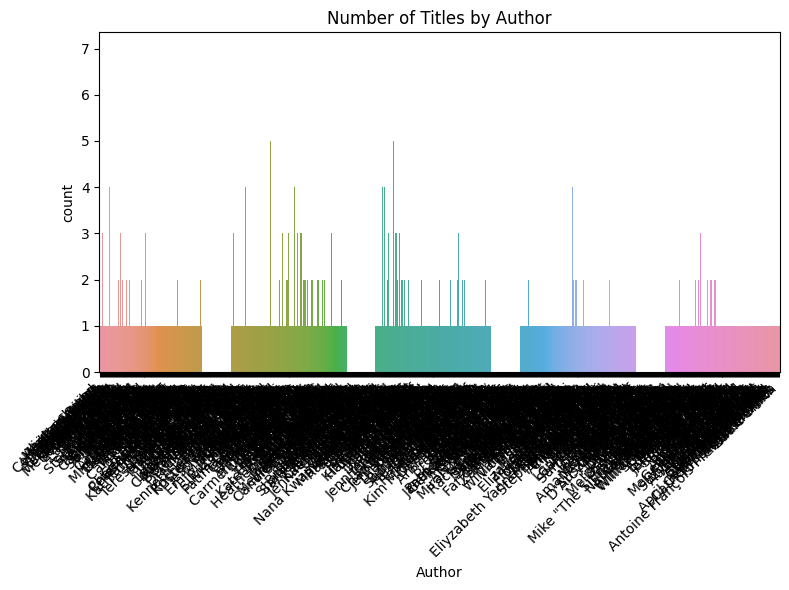

In [66]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Author', data=maindf1)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Titles by Author')
plt.tight_layout()